In [22]:
# Declare Dependencies
import glob, os
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import pymysql
pymysql.install_as_MySQLdb()
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

In [23]:
#Store CSV into a dataframe
csv_file = "Resources/Spotify_Data2019.csv"
tracks_data_df = pd.read_csv(csv_file)
tracks_data_df.head()

,Track_ID,Artist_ID,Artist_Name,Track_Name,Danceability,Energy,Loudness,Valence,Tempo,Popularity_Score
0,5eKWFYDP72IqdzmZLyu4d4,5gtNVNylJUg6NfvM0LjLtr,Intentional Vibes,Intention,0.0000,0.0465,-27.899,0.0000,0.000,70
1,3yXwX4nqtS9G9F8afZh5mk,4NJhFmfw43RLBLjQvxDuRS,Wolfgang Amadeus Mozart,"Serenade No. 10 in B-Flat Major, K. 361 ""Gran ...",0.0618,0.0291,-29.252,0.0411,64.018,0
2,6PpqrY1QzPLAj4JUOkrS95,25G0894RyKrGyKDqdG1pGu,Alex Couture,Echoes of Your Soul,0.0620,0.1040,-27.315,0.0346,68.798,63
3,0Md6JQpeEXKfZCMi1sQPGu,4NJhFmfw43RLBLjQvxDuRS,Wolfgang Amadeus Mozart,"Serenade No. 10 in B-Flat Major, K. 361 ""Gran ...",0.0623,0.0757,-22.673,0.0399,65.366,0
4,1OXqTngfr9pmDIgcmISa4K,4NJhFmfw43RLBLjQvxDuRS,Wolfgang Amadeus Mozart,"Serenade No. 10 in B-Flat Major, K. 361 ""Gran ...",0.0623,0.0757,-22.673,0.0399,65.366,0


In [24]:
# We create a new Dataframe with selected columns to perform our analysis
new_track_data_df = tracks_data_df[['Track_ID', 'Artist_ID', 'Artist_Name', 'Track_Name', 'Danceability', 'Loudness', 'Valence', 
                                    'Tempo', 'Popularity_Score' ]].copy()
new_track_data_df.head()

,Track_ID,Artist_ID,Artist_Name,Track_Name,Danceability,Loudness,Valence,Tempo,Popularity_Score
0,5eKWFYDP72IqdzmZLyu4d4,5gtNVNylJUg6NfvM0LjLtr,Intentional Vibes,Intention,0.0000,-27.899,0.0000,0.000,70
1,3yXwX4nqtS9G9F8afZh5mk,4NJhFmfw43RLBLjQvxDuRS,Wolfgang Amadeus Mozart,"Serenade No. 10 in B-Flat Major, K. 361 ""Gran ...",0.0618,-29.252,0.0411,64.018,0
2,6PpqrY1QzPLAj4JUOkrS95,25G0894RyKrGyKDqdG1pGu,Alex Couture,Echoes of Your Soul,0.0620,-27.315,0.0346,68.798,63
3,0Md6JQpeEXKfZCMi1sQPGu,4NJhFmfw43RLBLjQvxDuRS,Wolfgang Amadeus Mozart,"Serenade No. 10 in B-Flat Major, K. 361 ""Gran ...",0.0623,-22.673,0.0399,65.366,0
4,1OXqTngfr9pmDIgcmISa4K,4NJhFmfw43RLBLjQvxDuRS,Wolfgang Amadeus Mozart,"Serenade No. 10 in B-Flat Major, K. 361 ""Gran ...",0.0623,-22.673,0.0399,65.366,0


In [25]:
# Clean the data by dropping duplicates and setting the index
new_track_data_df.drop_duplicates("Track_ID", inplace=True)
new_track_data_df.set_index("Track_ID", inplace=True)

new_track_data_df.head()

,Artist_ID,Artist_Name,Track_Name,Danceability,Loudness,Valence,Tempo,Popularity_Score
Track_ID,,,,,,,,
5eKWFYDP72IqdzmZLyu4d4,5gtNVNylJUg6NfvM0LjLtr,Intentional Vibes,Intention,0.0000,-27.899,0.0000,0.000,70
3yXwX4nqtS9G9F8afZh5mk,4NJhFmfw43RLBLjQvxDuRS,Wolfgang Amadeus Mozart,"Serenade No. 10 in B-Flat Major, K. 361 ""Gran ...",0.0618,-29.252,0.0411,64.018,0
6PpqrY1QzPLAj4JUOkrS95,25G0894RyKrGyKDqdG1pGu,Alex Couture,Echoes of Your Soul,0.0620,-27.315,0.0346,68.798,63
0Md6JQpeEXKfZCMi1sQPGu,4NJhFmfw43RLBLjQvxDuRS,Wolfgang Amadeus Mozart,"Serenade No. 10 in B-Flat Major, K. 361 ""Gran ...",0.0623,-22.673,0.0399,65.366,0
1OXqTngfr9pmDIgcmISa4K,4NJhFmfw43RLBLjQvxDuRS,Wolfgang Amadeus Mozart,"Serenade No. 10 in B-Flat Major, K. 361 ""Gran ...",0.0623,-22.673,0.0399,65.366,0


In [26]:
#Connect to local database
connection_string = "root:Cuba@1105@localhost/spotify_db"
engine = create_engine(f'mysql://{connection_string}')

In [27]:
#Check for tables
engine.table_names()

['tracks_details']

In [28]:
#Use pandas to load csv converted DataFrame into database

new_track_data_df.to_sql(name='tracks_details', con=engine, if_exists='append', index=True)

In [30]:
#Confirm data has been added by querying the tracks_det table
pd.read_sql_query('select * from tracks_details', con=engine).head()

,Track_ID,Artist_ID,Artist_Name,Track_Name,Danceability,Loudness,Valence,Tempo,Popularity_Score
0,001UkMQHw4zXfFNdKpwXAF,0XKOBt59crntr7HQXXO8Yz,Brooks & Dunn,Brand New Man - with Luke Combs,0.573,-4.866,0.562,127.061,62
1,00BNT97AtJ5aB8SSsE5xGH,17lzZA2AlOHwCwFALHttmp,2 Chainz,Threat 2 Society,0.617,-5.084,0.887,83.332,67
2,00QuUxB7jJkBJW5ItNIGfi,4NJhFmfw43RLBLjQvxDuRS,Wolfgang Amadeus Mozart,"Piano Concerto No. 26 in D Major, K. 537 ""Coro...",0.000,0.000,0.000,0.000,0
3,0119caMtQHReUG2YpMbhyr,1hxkikLyXDIwfMF6dt50Gr,Guy Chambers,The Road to Mandalay,0.353,-26.106,0.239,87.359,65
4,015jLlgBeSkl3CApWJhlv7,5usbqiU7sjvszjWecANDL6,Boogie,Rainy Days (feat. Eminem),0.866,-6.254,0.171,106.949,75


In [32]:
# create new dataframe df_top ordered consisting of the 100 most popular tracks
df_top = new_track_data_df.sort_values('Popularity_Score', ascending=False)
df_top.head(50)

,Artist_ID,Artist_Name,Track_Name,Danceability,Loudness,Valence,Tempo,Popularity_Score
Track_ID,,,,,,,,
5w9c2J52mkdntKOmRLeM2m,4VMYDCV2IEDYJArk749S6m,Daddy Yankee,Con Calma,0.737,-2.652,0.6560,93.989,100
4y3OI86AEP6PQoDE6olYhO,7gOdHgIoIKoe4i9Tta6qdD,Jonas Brothers,Sucker,0.842,-5.065,0.9520,137.958,98
2Fxmhks0bxGSBdJ92vM42m,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,bad guy,0.708,-10.998,0.5780,131.926,98
4kV4N9D1iKVxx1KLvtTpjS,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,"break up with your girlfriend, i'm bored",0.726,-5.290,0.3350,169.999,98
14msK75pk3pA33pzPVNtBF,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,7 rings,0.725,-10.744,0.3190,70.142,97
6Qs4SXO9dwPj5GKvVOv8Ki,2wY79sveU1sp5g7SokKOiI,Sam Smith,Dancing With A Stranger (with Normani),0.741,-7.513,0.3470,102.998,96
2JvzF1RMd7lE3KmFlsyZD8,6l3HvQ5sa6mXTsMTB19rO5,J. Cole,MIDDLE CHILD,0.837,-11.713,0.4630,123.984,96
5WHTFyqSii0lmT9R21abT8,1MIVXf74SZHmTIp4V4paH4,Mabel,Don't Call Me Up,0.674,-2.853,0.2340,98.994,95
7COXchtUOMd6uIT6HvmRaI,5JZ7CnR6gTvEMKX4g70Amv,Lauv,i'm so tired...,0.599,-7.058,0.5340,102.211,95


In [34]:
# show the first 10 results
df_top[['Artist_Name', 'Track_Name', 'Popularity_Score']].head(10)

,Artist_Name,Track_Name,Popularity_Score
Track_ID,,,
5w9c2J52mkdntKOmRLeM2m,Daddy Yankee,Con Calma,100
4y3OI86AEP6PQoDE6olYhO,Jonas Brothers,Sucker,98
2Fxmhks0bxGSBdJ92vM42m,Billie Eilish,bad guy,98
4kV4N9D1iKVxx1KLvtTpjS,Ariana Grande,"break up with your girlfriend, i'm bored",98
14msK75pk3pA33pzPVNtBF,Ariana Grande,7 rings,97
6Qs4SXO9dwPj5GKvVOv8Ki,Sam Smith,Dancing With A Stranger (with Normani),96
2JvzF1RMd7lE3KmFlsyZD8,J. Cole,MIDDLE CHILD,96
5WHTFyqSii0lmT9R21abT8,Mabel,Don't Call Me Up,95
7COXchtUOMd6uIT6HvmRaI,Lauv,i'm so tired...,95


In [35]:
df_top.set_index("Artist_Name", inplace=True)
df_top.head()

,Artist_ID,Track_Name,Danceability,Loudness,Valence,Tempo,Popularity_Score
Artist_Name,,,,,,,
Daddy Yankee,4VMYDCV2IEDYJArk749S6m,Con Calma,0.737,-2.652,0.656,93.989,100
Jonas Brothers,7gOdHgIoIKoe4i9Tta6qdD,Sucker,0.842,-5.065,0.952,137.958,98
Billie Eilish,6qqNVTkY8uBg9cP3Jd7DAH,bad guy,0.708,-10.998,0.578,131.926,98
Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,"break up with your girlfriend, i'm bored",0.726,-5.290,0.335,169.999,98
Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,7 rings,0.725,-10.744,0.319,70.142,97


In [37]:
toptracks = df_top.groupby('Track_Name')['Popularity_Score'].mean().sort_values().tail(10)

C:\Users\cmoti\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


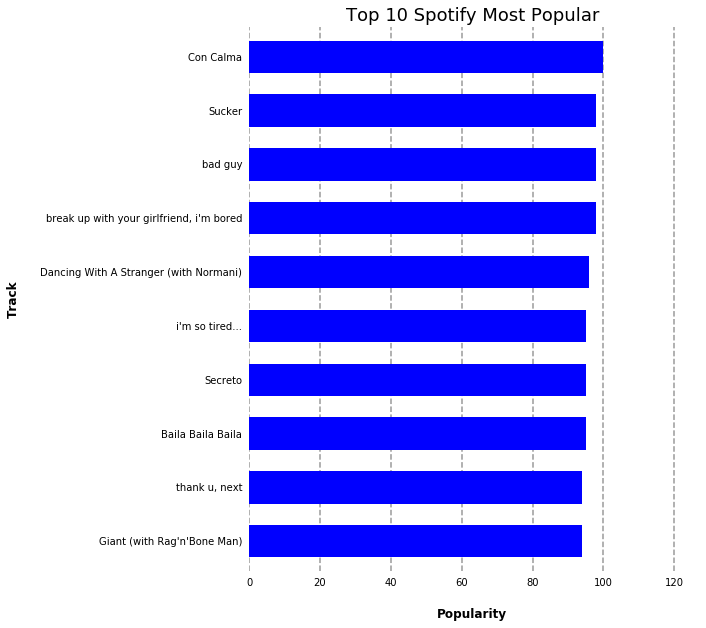

In [38]:
toptracks.plot(kind='barh')
ax = toptracks.plot(kind='barh', figsize=(8, 10), color='blue', zorder=2, width=0.60)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='black', zorder=1)

  # Set x-axis label
ax.set_xlabel("Popularity", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Track", labelpad=20, weight='bold', size=12)
 # Set the tittle
ax.set_title("Top 10 Spotify Most Popular", fontsize=18)
  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [40]:
top_artist = new_track_data_df.loc[new_track_data_df["Popularity_Score"] > 90]
top_artist.head(25)


,Artist_ID,Artist_Name,Track_Name,Danceability,Loudness,Valence,Tempo,Popularity_Score
Track_ID,,,,,,,,
43zdsphuZLzwA9k4DJhU0I,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,when the party's over,0.454,-14.038,0.187,124.155,91
1WSGTYKLEpKfNQYYW5Oymt,5CiGnKThu5ctn9pBxv7DGa,benny blanco,"I Canƒ??t Get Enough (benny blanco, Selena Gom...",0.541,-4.039,0.690,95.266,93
7COXchtUOMd6uIT6HvmRaI,5JZ7CnR6gTvEMKX4g70Amv,Lauv,i'm so tired...,0.599,-7.058,0.534,102.211,95
1DUSuNhF8P5vUGNPpQiZa5,6LuN9FCkKOj5PcnpouEgny,Khalid,My Bad,0.645,-9.127,0.391,84.999,91
6vWEAOUSxohKxhp0K1BsxL,1cNDP5yjU5vjeR8qMf4grg,YNW Melly,Mixed Personalities (feat. Kanye West),0.661,-9.104,0.352,149.937,91
5WHTFyqSii0lmT9R21abT8,1MIVXf74SZHmTIp4V4paH4,Mabel,Don't Call Me Up,0.674,-2.853,0.234,98.994,95
63cd4JkwGgYJrbOizbfmsp,0YinUQ50QDB7ZxSCLyQ40k,Mustard,Pure Water (with Migos),0.680,-5.545,0.137,202.006,92
6Hj9jySrnFppAI0sEMCZpJ,4MCBfE4596Uoi2O4DtmEMz,Juice WRLD,Robbery,0.685,-5.122,0.578,159.966,91
224EVTFiLsdQignUFLvDeH,0KPX4Ucy9dk82uj4GpKesn,Dalex,Pa M?? - Remix,0.688,-8.029,0.727,170.018,93


In [42]:
top_artist_group = top_artist[['Artist_Name','Popularity_Score']].groupby('Artist_Name').sum().sort_values('Popularity_Score', ascending=False)
top_artist_group

,Popularity_Score
Artist_Name,
Billie Eilish,464
Ariana Grande,383
Khalid,185
Daddy Yankee,100
Jonas Brothers,98
Sam Smith,96
J. Cole,96
Anuel Aa,95
Ozuna,95


C:\Users\cmoti\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


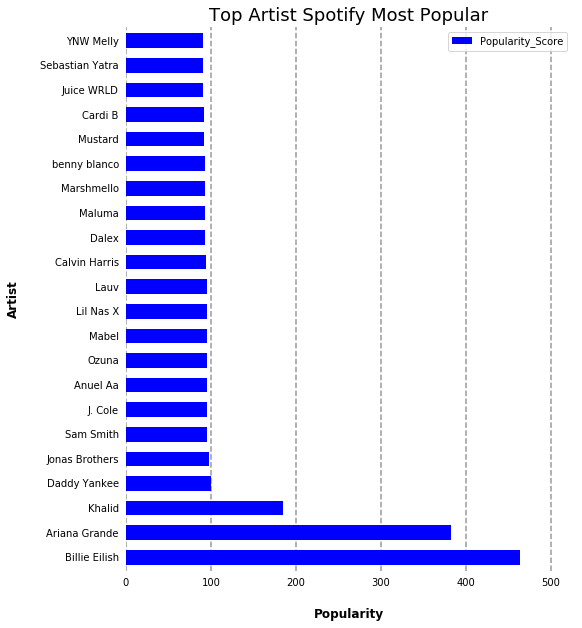

In [43]:
ax = top_artist_group.plot(kind='barh', figsize=(8, 10), color='blue', zorder=2, width=0.60)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='black', zorder=1)

  # Set x-axis label
ax.set_xlabel("Popularity", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Artist", labelpad=20, weight='bold', size=12)
 # Set the tittle
ax.set_title("Top Artist Spotify Most Popular", fontsize=18)
  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))